In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/swedish_insurance.csv')
x_train, x_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.4, random_state=3)

Estimate parameters for simple linear regression using <br>
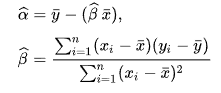

In [86]:
def simple_lr_coefficients(data_x, data_y):
    mean_x = np.mean(data_x)
    mean_y = np.mean(data_y)
    cov = np.cov(data_x, data_y)[0][1]
    var_x = np.var(data_x)
    
    b1 = cov / var_x
    b0 = mean_y - b1 * mean_x
    return (b0, b1)

In [87]:
def simple_lg_regression(x_train, x_test, y_train, y_test):
    predicted = list()
    b0, b1 = simple_lr_coefficients(x_train, y_train)
    for x in x_test:
        predicted.append(b0 + b1 * x)
    return predicted

In [88]:
predicted = simple_lg_regression(x_train, x_test, y_train, y_test)

In [89]:
mean_squared_error(y_test, predicted) ** 0.5

37.930195676295945

In [90]:
data = np.loadtxt('data/winequality-white.csv', delimiter=";", skiprows=1)
mmscaler = MinMaxScaler()
data = mmscaler.fit_transform(data)
x_train, x_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.3)

In [92]:
def predict(x, coeff):
    predicted = coeff[0]
    for i in range(len(x)):
        predicted += coeff[i + 1] * x[i]
    return predicted

In [93]:
def sgd_coefficients(x_train, y_train, alpha, epochs):
    coef = [0.0 for i in range(len(x_train[0]) + 1)]
    for epoch in range(epochs):
        sum_error = 0
        for i, x in enumerate(x_train):
            yhat = predict(x, coef)
            error = yhat - y_train[i]
            sum_error += error ** 2 
            coef[0] = coef[0] - alpha * error
            for j in range(len(x)):
                coef[j + 1] = coef[j + 1] - alpha * error * x[j]
        print(f'epoch={epoch}, alpha={alpha}, error={sum_error}')
    return coef

In [94]:
sgd_coef = sgd_coefficients(x_train, y_train, 0.001, 50)

epoch=0, alpha=0.001, error=132.50482873248578
epoch=1, alpha=0.001, error=66.29187174375613
epoch=2, alpha=0.001, error=64.6681732854041
epoch=3, alpha=0.001, error=63.40020970323859
epoch=4, alpha=0.001, error=62.39876953680094
epoch=5, alpha=0.001, error=61.5959155301054
epoch=6, alpha=0.001, error=60.94184735629663
epoch=7, alpha=0.001, error=60.40001204569825
epoch=8, alpha=0.001, error=59.94353108663898
epoch=9, alpha=0.001, error=59.55259445884896
epoch=10, alpha=0.001, error=59.21255968357969
epoch=11, alpha=0.001, error=58.91256492927978
epoch=12, alpha=0.001, error=58.64451695445693
epoch=13, alpha=0.001, error=58.40235239012671
epoch=14, alpha=0.001, error=58.18149836307939
epoch=15, alpha=0.001, error=57.978478508286
epoch=16, alpha=0.001, error=57.79062503359075
epoch=17, alpha=0.001, error=57.61586815450624
epoch=18, alpha=0.001, error=57.45258198469968
epoch=19, alpha=0.001, error=57.29947163087002
epoch=20, alpha=0.001, error=57.1554903695919
epoch=21, alpha=0.001, erro

In [95]:
y_predicted = [predict(x, sgd_coef) for x in x_test]

In [96]:
np.sqrt(mean_squared_error(y_test, y_predicted))

0.12726076938186448